# データの読み込み

In [49]:
# 30
%matplotlib inline
import numpy as np
import pandas as pd

In [50]:
#CSVの読み込み
df=pd.read_csv('housing.csv')

In [51]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布の確認

In [52]:
## matplotlib が使えることが前提
%matplotlib inline
import seaborn as sns

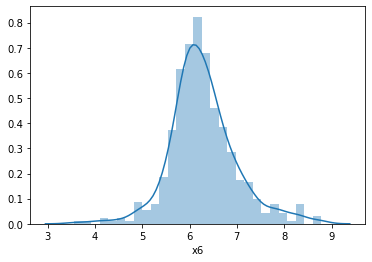

In [53]:
# 分布の確認
sns.distplot(df['x6'])

# 外れ値除去　（３σ法）
正規分布に従っていることが、３σ法で除去できる条件

In [54]:
col='x6'

In [55]:
# 平均の計算
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [56]:
# x6の平均
mean[col]

6.284634387351788

In [57]:
# 標準偏差の計算(Standard deviation)
sigma=df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [58]:
# x6の標準偏差
sigma[col]

0.7026171434153234

In [61]:
# 3σ方の下限
low=mean[col]-3 * sigma[col]
low

4.176782957105817

In [62]:
# 3σ方の上限
high=mean[col]+3 * sigma[col]
high

8.392485817597759

In [64]:
# 外れ値除去
df2=df[(df[col]>low) & (df[col]<high)]
df2.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
len(df)

506

In [13]:
len(df2)

498

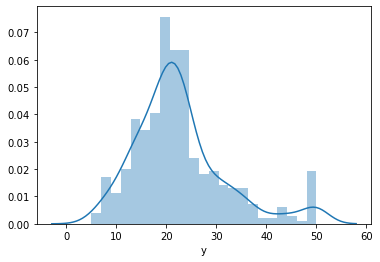

In [42]:
import seaborn as sns
import japanize_matplotlib
# 分布の確認 (オリジナル)
sns.distplot(df[col])

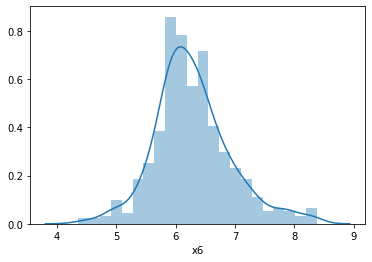

In [15]:
# 分布の確認 (外れ値除去後)
sns.distplot(df2[col])

# 全項目の外れ値除去

In [65]:
# ヘッダの項目名を変数に格納する。（ループがやりやすい）
cols=df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [66]:
_df=df
for col in cols:
    # ３σ法の上下限値を設定する
    low=mean[col]-3*sigma[col]
    high=mean[col]+3*sigma[col]
    # 条件で絞込
    _df=_df[(_df[col]>low) & (_df[col]<high)]

In [71]:
# オリジナル
len(df)

506

In [74]:
# ３σ法で除去する。　（２０％程度減っているが、正規分布に従っていない場合は多く減る。）
# サンプルが減りすぎる場合は、
#    ・外れ値を平均値や中央値で埋めるというやり方もある
#    ・主成分分析等を使って、潜在変数に変換した後に３σ法を適用する
len(_df)

415

In [69]:
# 入力データ
X=_df.iloc[:,:-1]

In [70]:
# 出力データ
y=_df.iloc[:,-1]

In [22]:
# 訓練データと検証データ

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# 訓練データと検証データの分割
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=1) #random_stateは再現性を確保するために指定する

# 重回帰分析

In [25]:
from sklearn.linear_model import LinearRegression
# モデルの宣言
model=LinearRegression()

In [26]:
# モデルの学習 <-訓練データに対する学習
model.fit(X_train,y_train)

LinearRegression()

In [27]:
# 検証 <-検証データ
model.score(X_test,y_test)

0.6253776004329576

In [28]:
# 検証 <-訓練データ (検証データと値が近いなら信用できる。どこまでの差異を近いとするかはそれぞれ判断する必要がある。)
model.score(X_train ,y_train)

0.7972109224535134

In [29]:
# 過学習　（オーバーフィッティング）

# スケーリング

データの標準化

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
# Scaler の宣言
scaler=StandardScaler()

In [32]:
# scaler の学習　←平均と標準偏差を計算する
scaler.fit(X_train)

StandardScaler()

In [33]:
# scalling
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [34]:
# モデルの宣言
model2=LinearRegression()

In [35]:
model2.fit(X_train2 ,y_train)

LinearRegression()

In [36]:
model2.score(X_train2 ,y_train)

0.7972109224535133

In [37]:
model2.score(X_test2 ,y_test)

0.6253776004329596

In [38]:
# 重みの確認
model2.coef_

array([-1.95426423e-01,  2.11543329e-01,  5.08277354e-01,  6.66133815e-16,
       -1.21336016e+00,  3.91986658e+00, -3.69861217e-01, -1.85711554e+00,
        1.16625182e+00, -1.52855186e+00, -1.87256630e+00,  2.44427080e-01,
       -2.76100147e+00])

In [39]:
np.set_printoptions(precision=3 ,suppress=True)   #precision は小数点以下の桁数、suppress=True は指数の表示を禁止する

In [40]:
# 重みの確認
model2.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])

In [43]:
model.coef_

array([ -0.04 ,   0.011,   0.076,  -0.   , -10.671,   6.27 ,  -0.013,
        -0.947,   0.146,  -0.01 ,  -0.885,   0.005,  -0.433])